## Importing necessary libraries

In [6]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Loading the datset

In [7]:
data = pd.read_csv("Grow_Locations.csv")

## Doing the initial checks in the data

In [8]:
data.head()

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime
0,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
1,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
2,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
3,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
4,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z


## Checking the total no. of rows in the data

In [9]:
data.shape

(39294, 8)

## By initital investigation, it seems that the longitude has been incorrectly renamed as lattitude and vice versa. Therefore renaming the two columns

In [10]:
data.rename(columns={"Latitude":"Longitude","Longitude":"Latitude"}, inplace= True)


## Verifying the column change

In [11]:
data.head()

,Serial,Longitude,Latitude,Type,SensorType,Code,BeginTime,EndTime
0,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
1,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
2,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
3,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
4,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z


## Data Cleaning

### Cleaning the data for acceptable values of latitude and longitudes

In [12]:
data = data[(data["Latitude"]>-90.681) & (data["Latitude"]<90)]

In [13]:
data = data[(data["Longitude"]>-180) & (data["Longitude"]<180)]

### Verifying the changes 

In [14]:
data.shape

(39240, 8)

In [15]:
data.isna().sum()

Serial        42
Longitude      0
Latitude       0
Type           0
SensorType     0
Code           0
BeginTime      0
EndTime        0
dtype: int64

### Removing the sensors with no Serial ID

In [16]:
data.dropna(inplace=True)

In [17]:
data.isna().sum()

Serial        0
Longitude     0
Latitude      0
Type          0
SensorType    0
Code          0
BeginTime     0
EndTime       0
dtype: int64

In [19]:
data.shape

(39198, 8)

### Removing the rows where where latitude and longitude is equal to zero as this location is a null island.

In [20]:
data = data[(data["Latitude"]!=0) & (data["Longitude"]!=0)]

### Verifying the changes

In [21]:
data.shape

(33648, 8)

In [22]:
data[data["Longitude"]==0]

,Serial,Longitude,Latitude,Type,SensorType,Code,BeginTime,EndTime


In [23]:
data[data["Latitude"]==0]

,Serial,Longitude,Latitude,Type,SensorType,Code,BeginTime,EndTime


## After cleaning the data we are left with only 33648 points

## Creating the bounding box for the map

In [24]:
boundaries = [-10.592,1.6848,50.681,57.985]

In [25]:
boundaries

[-10.592, 1.6848, 50.681, 57.985]

## Loading the map png file

In [26]:
map = plt.imread('map7.png')

## Plotting points on the map

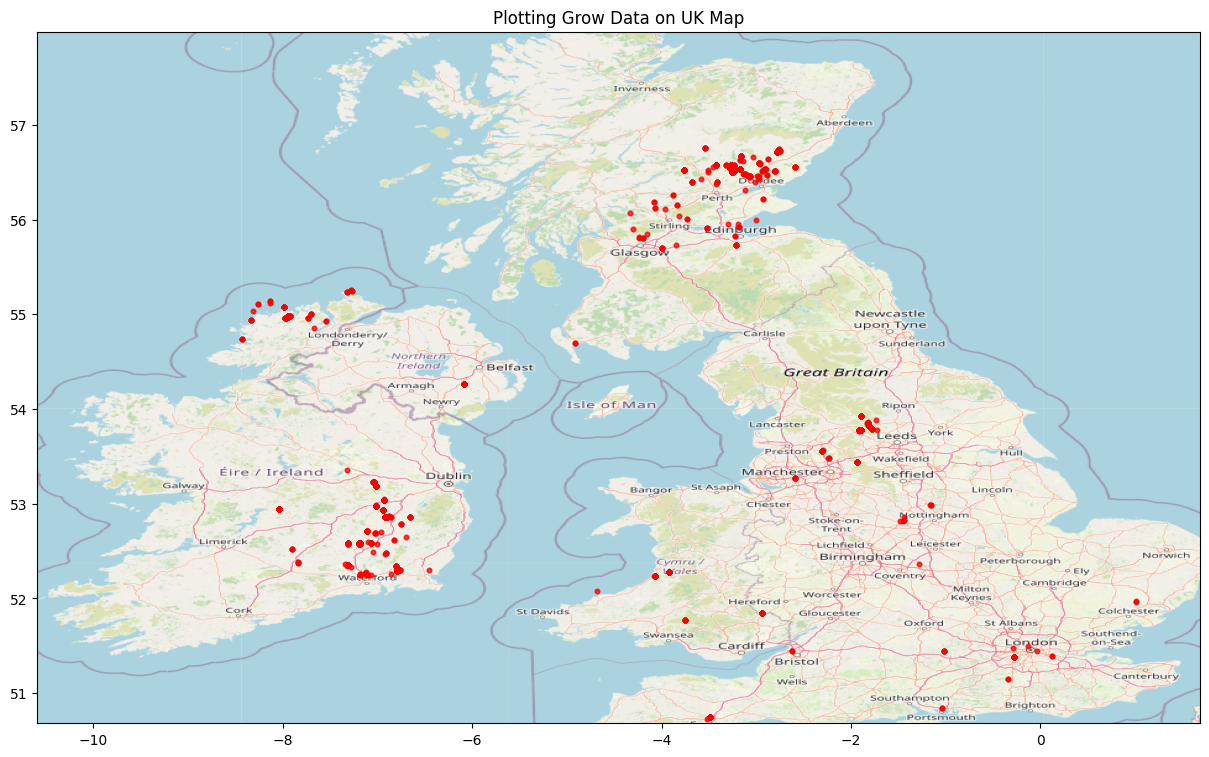

In [27]:
fig, ax = plt.subplots(figsize = (15,13))
ax.scatter(data.Longitude, data.Latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Plotting Grow Data on UK Map')
ax.set_xlim(boundaries[0],boundaries[1])
ax.set_ylim(boundaries[2],boundaries[3])
ax.imshow(map, zorder=0, extent = boundaries, aspect= 'equal')

## Saving the output map image to a file

In [28]:
ax.figure.savefig('output.png',bbox_inches='tight')

### Please note Ahmed Qasim's article on plotting geographic data on a map has been referenced while writing the above code.
### Here is the link  https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db